# Exercise 

1. Use the **load_wine** data (remember to split your data into a train and test data). Go through the steps in the previous slides to find the most important features.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

# Use the `load_wine` function to construct your dataset
X, y = load_wine(return_X_y=True)
wine = load_wine()
print(wine.target_names)
print(wine.DESCR)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:           

In [2]:
# Initialize a DT
dt = tree.DecisionTreeClassifier(
                min_samples_split=5,
                min_samples_leaf=5,
                max_features=5,random_state=42    
                )

# Fit your DT
dt.fit(X_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(X_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy = accuracy_score(y_test,y_test_hat)

# Print results
print(f'DT with default settings achieved {round(accuracy * 100, 1)}% accuracy.')

DT with default settings achieved 91.7% accuracy.


In [3]:
# Show top 10 featuers. No need to change the code, but you can change the 10 to show fewer (or more) featuees
import pandas as pd

importances = dt.feature_importances_
names = load_wine()['feature_names']

feature_importance = pd.DataFrame(zip(names, importances), columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index()
feature_importance[:10]

,index,Feature,Importance
0,12,proline,0.432742
1,11,od280/od315_of_diluted_wines,0.389904
2,9,color_intensity,0.161335
3,6,flavanoids,0.016019
4,0,alcohol,0.000000
5,1,malic_acid,0.000000
6,2,ash,0.000000
7,3,alcalinity_of_ash,0.000000
8,4,magnesium,0.000000
9,5,total_phenols,0.000000


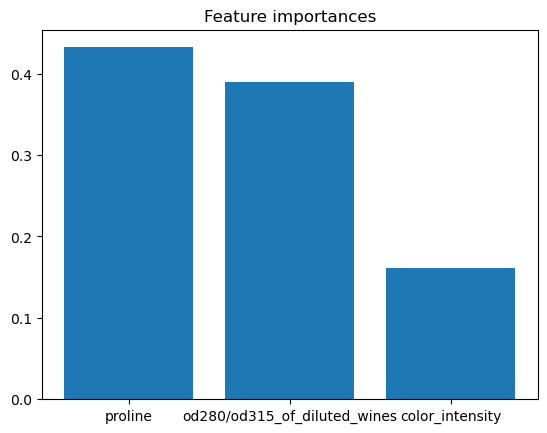

In [4]:
# Plot it - no need to change anything, but you can change the 3 to another number if you want to show more features.
from matplotlib import pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(feature_importance['Feature'][:3], feature_importance['Importance'][:3])
plt.show()

In [5]:
# Tree based on most important features only
top_features = (-importances).argsort()[:5]
print(top_features)

Z_train = X_train[:, top_features]
Z_test = X_test[:, top_features]

dt = tree.DecisionTreeClassifier(
                min_samples_split=5,
                min_samples_leaf=5,
                max_features=5,
                )

# Fit your DT
dt.fit(Z_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(Z_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with only top features achieved {round(accuracy * 100, 1)}% accuracy.')

[12 11  9  6  0]
DT with only top features achieved 94.4% accuracy.
